# pandas - a Pythonic interface

**Dr. Kristian Rother** 

[www.academis.eu](http://www.academis.eu)

![Academis Logo](images/academis_logo.png)

# Ovogena lano-lakto-porko

![Wollmilchsau](images/wollmilchsau.png)

(Esperanto for *"eierlegende Wollmilchsau"*)

*photograph by Georg Mittenecker [kamelopedia.mormo.org](http://kamelopedia.mormo.org/index.php/Datei:Wollmilchsau.jpg) CC BY-SA 2.5*

# Sometimes you need to make a compromise

![Platypus](images/platypus.jpg)

*image by Heinrich Harder, Public Domain [wikimedia commons](https://commons.wikimedia.org/w/index.php?curid=2425503)*

# The Dataset of U.S. Baby Names

![Ewa](images/baby.png)

**all names used more than 5x a year since 1880**

available at [www.ssa.gov/oact/babynames/limits.html](http://www.ssa.gov/oact/babynames/limits.html)

# Reading a dataset with pandas

In [1]:
import pandas as pd

names = []
PATH = 'names'

for year in range(1880, 2015):
    fn = '{}/yob{}.txt'.format(PATH, year)
    
    data_frame = pd.read_csv(fn, names=['name', 'gender', 'count'])
    data_frame['year'] = year
    
    names.append(data_frame)

*`pandas` looks like the average Python library so far.*

# Reading a dataset with pandas

In [2]:
names = pd.concat(names)
names[:10]

,name,gender,count,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


# Statistics for girls names
*boolean expressions inside an index?*

In [3]:
def findname(df, name): 
    return df[df['name']==name].sort_values(by='year')

girls = names[names.gender=='F']
findname(girls, "Khaleesi")

,name,gender,count,year
4977,Khaleesi,F,28,2011
1517,Khaleesi,F,146,2012
1019,Khaleesi,F,243,2013
754,Khaleesi,F,368,2014


# Statistics for boys names
*the double square bracket is not a typo!*

In [4]:
boys = names[names.gender=='M']

tyrion = findname(boys, "Tyrion")
tyrion = tyrion[["year", "count"]]
tyrion = tyrion.set_index('year')
tyrion.transpose()

year,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
count,5,5,8,11,10,14,14,15,14,12,14,16,17,11,18,20,43,60


# Frequency of the name 'Madonna' in the U.S.

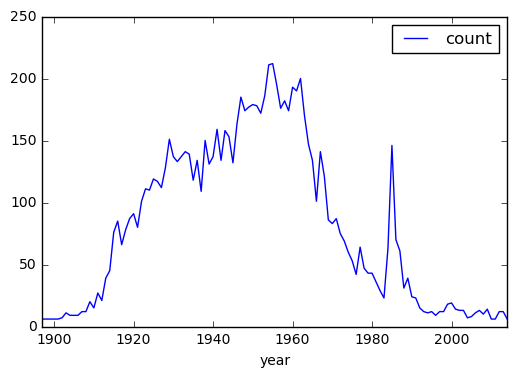

In [13]:
madonna = findname(girls, "Madonna")
madonna = madonna.set_index('year')
madonna.to_csv('madonna.csv')
madonna.plot()

![Madonna](images/madonna.png)

# Total population
*group, select, sum, slice all in one*

In [6]:
names.groupby('year')['count'].apply(sum)[::20]

year
1880     201484
1900     450327
1920    2262746
1940    2302225
1960    4154810
1980    3443809
2000    3777007
Name: count, dtype: int64

# Names with four e's
*apply a function and create a new column*

In [7]:
def eeee(x): return x.lower().count('e') == 4

names['eeee'] = names['name'].apply(eeee)
names[names['eeee']]['name'][:3]

201     Genevieve
931     Tennessee
1899     Everette
Name: name, dtype: object

# First character preference: boy/girl ratio

In [13]:
names['first_char'] = names['name'].apply(lambda x:x[0])

mrc = names[names.gender=='M'].groupby('first_char')['count'].apply(sum)
frc = names[names.gender=='F'].groupby('first_char')['count'].apply(sum)
ratio = mrc / frc
ratio[:10]

first_char
A    0.697584
B    0.936245
C    0.992701
D    1.468989
E    0.738231
F    1.468220
G    1.617667
H    0.945726
I    0.675881
J    1.963427
Name: count, dtype: float64

# Conclusions
## Pro pandas
* powerful expressions in a few lines
* based on numpy --> fast, millions of lines
* copes with gaps in data well
* integration with scikit-learn

## Con pandas
* syntax is a bit obscure at times
* steep learning curve

# Don't try using all features at the same time!

![Milk](images/milch-junkie.jpg)

### Contact

e-Mail: `krother@academis.eu`

Twitter: `@k_rother`

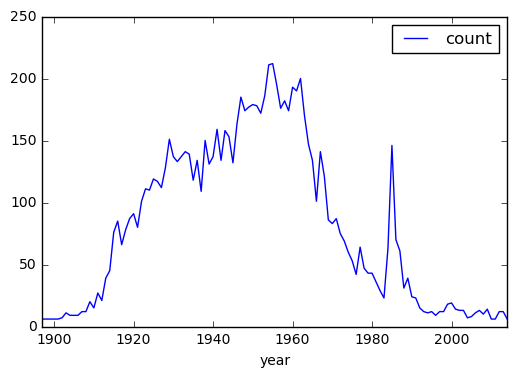

In [11]:
# generating Madonna plot
madonna = madonna.set_index('year')
%matplotlib inline
madonna.plot()